In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
train_data=pd.read_csv('final_train_data.csv')
df=train_data.copy()

In [3]:
df.head()

,Unnamed: 0,Country Name,Country Code,Year,Balance,Inflation,GDP,Exports,Trade
0,0,Senegal,SEN,1983,-3.043829e+08,9.274213,-5.326393,6.180000e+08,59.224298
1,1,Togo,TGO,2009,-1.766692e+08,1.855275,3.510297,9.030260e+08,76.242542
2,2,Pakistan,PAK,1992,-1.876092e+09,10.057085,7.705898,7.351000e+09,34.489440
3,3,Nepal,NPL,1988,-2.714506e+08,11.815310,7.696809,1.900000e+08,24.978422
4,5,Malta,MLT,2016,7.269132e+08,1.604548,5.516617,3.017299e+09,83.781471


In [4]:
df.isnull().sum()

Unnamed: 0        0
Country Name      0
Country Code      0
Year              0
Balance           0
Inflation       245
GDP             244
Exports          16
Trade           202
dtype: int64

In [5]:
df['Inflation'].fillna(df['Inflation'].median(),inplace=True)
df['GDP'].fillna(df['GDP'].median(),inplace=True)
df['Exports'].fillna(df['Exports'].median(),inplace=True)
df['Trade'].fillna(df['Trade'].median(),inplace=True)

In [7]:
df.isnull().sum()

Unnamed: 0      0
Country Name    0
Country Code    0
Year            0
Balance         0
Inflation       0
GDP             0
Exports         0
Trade           0
dtype: int64

In [8]:
# Features of the dataset: Country Name: Name of the country Country 
# Code: Code assigned of the country
# Year 
# Balance: International balance with the world bank for the country. (To be predicted) 
# Inflation: Inflation in percentage for that particular year 
# GDP: GDP growth for that particular year 
# Exports: Exports of the country for that particular year 
# Trade: Trade figures for the country for that particular year Length of train data

In [9]:
#Checking The DIstribution Of The Data

In [10]:
import scipy.stats as stat
from matplotlib import pylab
from pylab import *

In [11]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1) #1 row 2 columns
    df[feature].hist()
    plt.subplot(1,2,2) #1st row 2nd column 2nd index
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

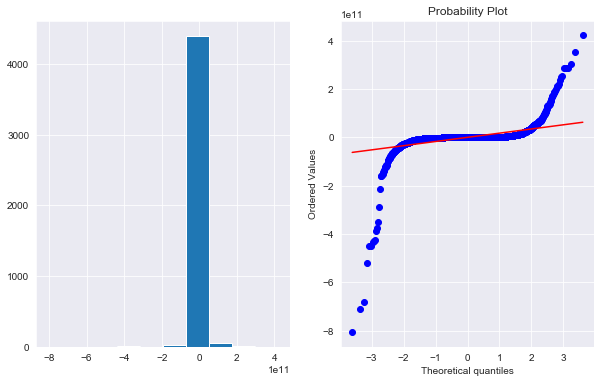

In [12]:
plot_data(df,'Balance')

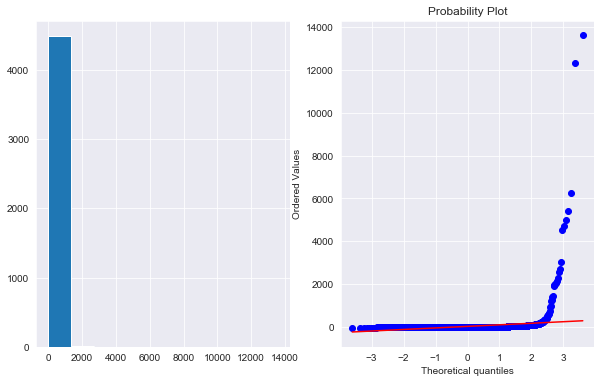

In [13]:
plot_data(df,'Inflation')#This feature is very much skewed----> Transformation needs to be applied

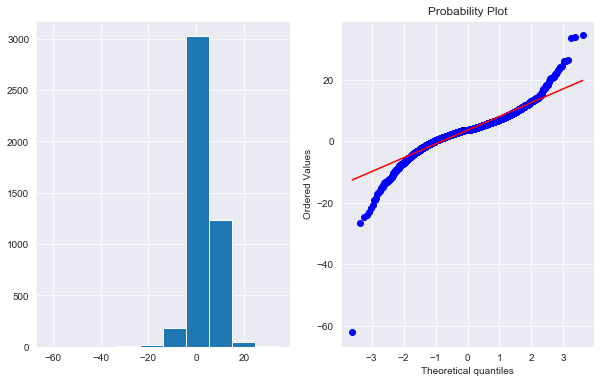

In [14]:
plot_data(df,'GDP')

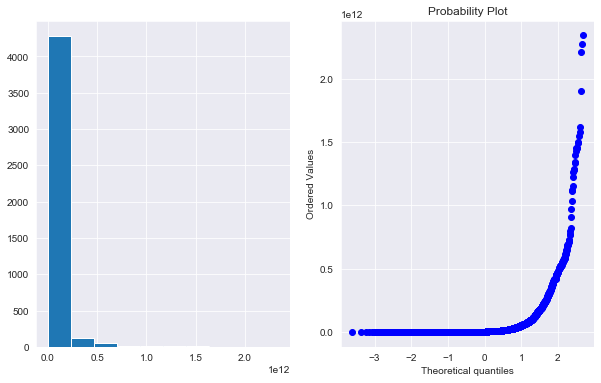

In [11]:
plot_data(df,'Exports')

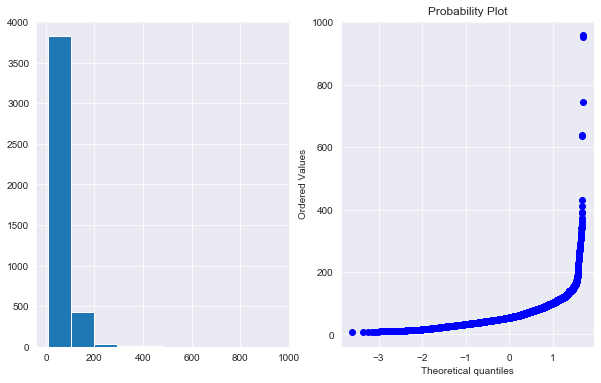

In [12]:
plot_data(df,'Trade')

In [13]:
#Since the data is not in a quite good format/distribution, let's try to get in good distribution by applying various transformations

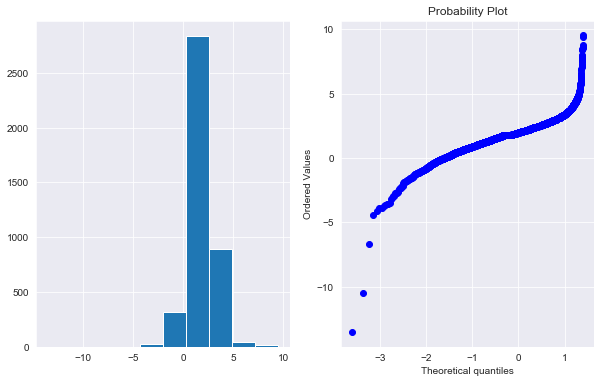

In [15]:
import numpy as np
df['Inflation_log']=np.log(df['Inflation'])
plot_data(df,'Inflation_log')

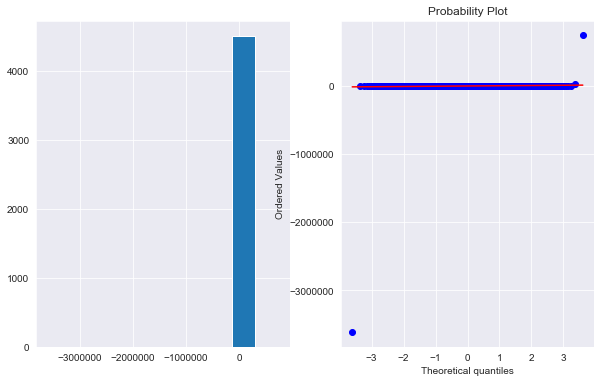

In [16]:
df['Inflation_REciprocal']=1/df.Inflation
plot_data(df,'Inflation_REciprocal')

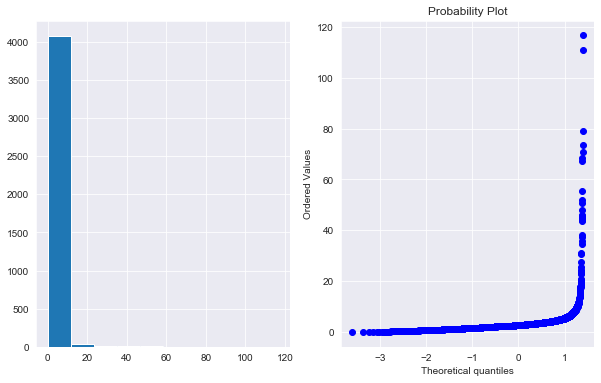

In [17]:
#SQUARE ROOT TRANSFORMATION
df['Inflation_square']=df.Inflation**(1/2)
plot_data(df,'Inflation_square')

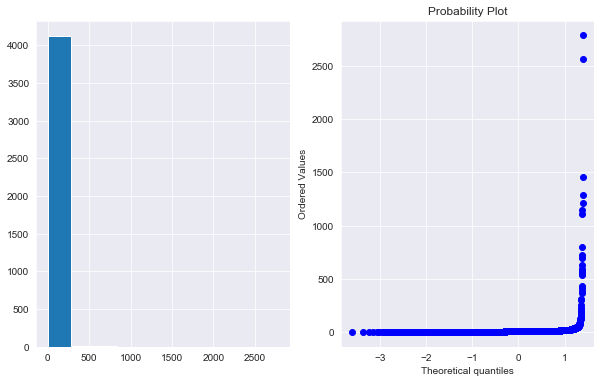

In [18]:
df['Inflation_Exponential']=df.Inflation**(1/1.2)
plot_data(df,'Inflation_Exponential')

In [19]:
# df['Inflation_Boxcox'],parameters=stat.boxcox(df['Inflation'])

In [20]:
#Of all the applied transformations , Logarithmic Transformation fits good.

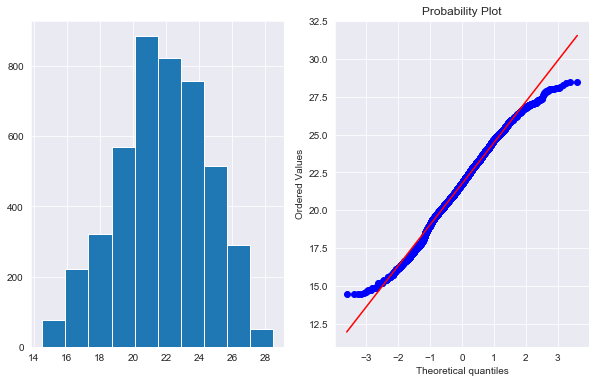

In [21]:
df['Exports_log']=np.log(df['Exports'])
plot_data(df,'Exports_log')

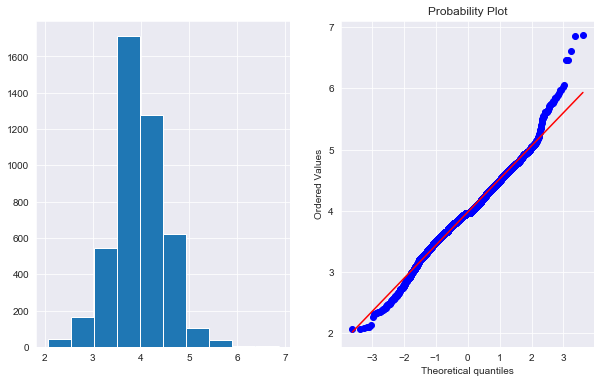

In [22]:
df['Trade_log']=np.log(df['Trade'])
plot_data(df,'Trade_log')

In [23]:
df.head()

,Unnamed: 0,Country Name,Country Code,Year,Balance,Inflation,GDP,Exports,Trade,Inflation_log,Inflation_REciprocal,Inflation_square,Inflation_Exponential,Exports_log,Trade_log
0,0,Senegal,SEN,1983,-3.043829e+08,9.274213,-5.326393,6.180000e+08,59.224298,2.227238,0.107826,3.045359,6.398294,20.241999,4.081332
1,1,Togo,TGO,2009,-1.766692e+08,1.855275,3.510297,9.030260e+08,76.242542,0.618033,0.539004,1.362085,1.673684,20.621262,4.333920
2,2,Pakistan,PAK,1992,-1.876092e+09,10.057085,7.705898,7.351000e+09,34.489440,2.308277,0.099432,3.171291,6.845315,22.718102,3.540653
3,3,Nepal,NPL,1988,-2.714506e+08,11.815310,7.696809,1.900000e+08,24.978422,2.469396,0.084636,3.437341,7.828964,19.062535,3.218012
4,5,Malta,MLT,2016,7.269132e+08,1.604548,5.516617,3.017299e+09,83.781471,0.472842,0.623228,1.266708,1.482953,21.827628,4.428212


In [24]:
df.columns

Index(['Unnamed: 0', 'Country Name', 'Country Code', 'Year', 'Balance',
       'Inflation', 'GDP', 'Exports', 'Trade', 'Inflation_log',
       'Inflation_REciprocal', 'Inflation_square', 'Inflation_Exponential',
       'Exports_log', 'Trade_log'],
      dtype='object')

In [25]:
df.drop(['Unnamed: 0', 'Country Code','Inflation','Exports', 'Trade','Inflation_REciprocal', 'Inflation_square', 'Inflation_Exponential'],1,inplace=True)

In [26]:
# df.drop('GDP_log',1,inplace=True)

In [28]:
df.head()

,Country Name,Year,Balance,GDP,Inflation_log,Exports_log,Trade_log
0,Senegal,1983,-3.043829e+08,-5.326393,2.227238,20.241999,4.081332
1,Togo,2009,-1.766692e+08,3.510297,0.618033,20.621262,4.333920
2,Pakistan,1992,-1.876092e+09,7.705898,2.308277,22.718102,3.540653
3,Nepal,1988,-2.714506e+08,7.696809,2.469396,19.062535,3.218012
4,Malta,2016,7.269132e+08,5.516617,0.472842,21.827628,4.428212


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf1=TfidfVectorizer(ngram_range=(1,2),lowercase=True)
country=tf1.fit_transform(df['Country Name']).toarray()

In [30]:
country

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
df_num=df[['GDP','Inflation_log','Exports_log','Trade_log','Year']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024B86FEE1C8>,
      dtype=object)

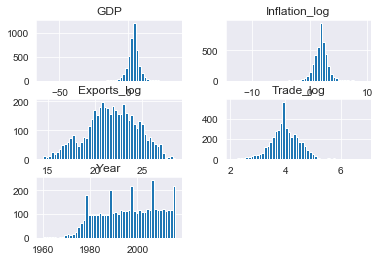

In [32]:
df_num.hist(bins=50)

In [48]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X_num=sc.fit_transform(df_num)

In [49]:
X_num

array([[0.58761571, 0.68344989, 0.41032996, 0.41955727, 0.41071429],
       [0.67911563, 0.61358799, 0.43747346, 0.4722333 , 0.875     ],
       [0.72255919, 0.68696814, 0.58754239, 0.30680115, 0.57142857],
       ...,
       [0.66539733, 0.62621964, 0.1647939 , 0.39305678, 0.69642857],
       [0.60621562, 0.65643694, 0.45288462, 0.26899759, 0.39285714],
       [0.70479971, 0.54472566, 0.5451797 , 0.53224814, 0.98214286]])

In [50]:
X = np.concatenate((country,X_num),axis = 1)
X

array([[0.        , 0.        , 0.        , ..., 0.41032996, 0.41955727,
        0.41071429],
       [0.        , 0.        , 0.        , ..., 0.43747346, 0.4722333 ,
        0.875     ],
       [0.        , 0.        , 0.        , ..., 0.58754239, 0.30680115,
        0.57142857],
       ...,
       [0.        , 0.        , 0.        , ..., 0.1647939 , 0.39305678,
        0.69642857],
       [0.        , 0.        , 0.        , ..., 0.45288462, 0.26899759,
        0.39285714],
       [0.        , 0.        , 0.        , ..., 0.5451797 , 0.53224814,
        0.98214286]])

In [51]:
y=df.Balance

In [52]:
df_num.isnull().sum()

GDP              0
Inflation_log    0
Exports_log      0
Trade_log        0
Year             0
dtype: int64

In [44]:
df_num['Inflation_log'].fillna(df_num['Inflation_log'].median(),inplace=True)

In [45]:
df_num.isnull().sum()

GDP              0
Inflation_log    0
Exports_log      0
Trade_log        0
Year             0
dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=42)

In [54]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=500,max_features='auto',verbose=1,n_jobs=-1)
reg.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   21.1s finished


RandomForestRegressor(n_estimators=500, n_jobs=-1, verbose=1)

In [55]:
reg.score(X_train,y_train)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished


0.9860129547667319

In [56]:
y_pred=reg.predict(X_test)
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished


0.7748526678082467

In [57]:
from sklearn.linear_model import Ridge
reg2=Ridge(alpha=1.0)
reg2.fit(X_train,y_train)
reg2.score(X_train,y_train)

0.4376651361880356

In [59]:
from sklearn.tree import DecisionTreeRegressor

In [60]:
reg3=DecisionTreeRegressor()
reg3.fit(X_train,y_train)
reg3.score(X_train,y_train)

1.0

In [61]:
preds=reg3.predict(X_test)
metrics.r2_score(y_test,preds)

0.7705518717003094